# Visualization with prosections

This is a python implementation of the projection of a section, i.e., **the prosection method** described in the paper:

T. Tušar and B. Filipič. Visualization of Pareto front approximations in evolutionary multiobjective optimization: A critical review and the prosection method. *IEEE Transactions on Evolutionary Computation*, 19(2):225-245, 2015.

Author: Tea Tušar, Jožef Stefan Institute, Slovenia (tea.tusar@ijs.si)

In [1]:
import numpy as np
from math import sin, cos, radians

In [2]:
def prosection(input_set, 
               coordinates=np.array([0, 1]), 
               angle_deg=45, 
               width=0.05, 
               origin=None, 
               normalize=False):
    '''      
    Performs prosection (a reduction in one dimension) on the given coordinates of the input_set (X, Y) with 
    angle_deg (A), width (D) and origin (O1, O2):
       Z = (X - O1)*cos(A) + (Y - O2)*sin(A)
    for all points (X, Y), in the section, i.e., all points for which
       abs((X - O1)*sin(A) - (Y - O2)*cos(A)) <= D
    If origin is None, the minimal values from the input_set at the given coordinates are taken. 
    If normalize is True, the input_set is first normalized to [0, 1]^2. 
    '''            
    if input_set is None or input_set.size < 2:
        raise ValueError('Incorrect dimensionality of the input set (needs to be at least 2).')
        
    if coordinates is None or coordinates.size != 2:
        raise ValueError('Incorrect dimensionality of the coordinates (needs to be exactly 2).')
        
    if angle_deg < 0 or angle_deg > 90:
        raise ValueError('Incorrect value for angle (in degrees; needs to be within [0, 90]).')
        
    if width <= 0:
        raise ValueError('Incorrect value for section width (needs to be greater than 0).')
        
    working_set = np.array(input_set[:, coordinates])
    
    if normalize:
        working_set = (working_set - working_set.min(axis=0)) / (working_set.max(axis=0) - working_set.min(axis=0))
    
    if origin is None:
        origin = working_set.min(axis=0)
    else:
        origin = np.array(origin)
        
    angle_rad = radians(angle_deg)
    
    def in_section(x):
        return abs((x[0]-origin[0])*sin(angle_rad) - (x[1]-origin[1])*cos(angle_rad)) <= width
        
    def prosection_f(x):
        if in_section(x):
            return (x[0]-origin[0])*cos(angle_rad) + (x[1]-origin[1])*sin(angle_rad)
        else:
            return None
    
    output_set = map(prosection_f, working_set)
    output_set = np.fromiter(output_set, dtype=np.float) 
    
    return output_set

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [4]:
def plot_prosection(input_sets,
                    coordinates=np.array([0, 1, 2, 3]), 
                    angle_deg=45, 
                    width=0.05,
                    origin=np.zeros(4), 
                    normalize=False):
    '''      
    Visualizes with prosections an array of 4D approximation sets. Coordinates give the indices of the four columns
    containing the objectives of interest. Prosection is performed on the first two columns with the given angle (in  
    degrees), section width and the origin (taking its first two coordinates).
    
    Note that if the origin is None or if normalize is set to True, computation of the origin and normalization are
    performed only for the first two coordinates and for each approximation set separately!
    ''' 
    output_sets = []
    for input_set in input_sets:
        output_sets.append(prosection(input_set, coordinates[0:2], angle_deg, width, origin, normalize))
        
    fig = plt.figure()
    fig.set_size_inches(8, 8)    
    colors = cm.Set1(np.linspace(0, 1, 10))
    ax = Axes3D(fig)
    
    ax.scatter(0, origin[coordinates[2]], origin[coordinates[3]], c='black', marker="s", label='Origin')
    for input_set, output_set, c in zip(input_sets, output_sets, colors):
        ax.scatter(output_set, input_set[:,coordinates[2]], input_set[:,coordinates[3]], c=c, marker="o", alpha=0.5)
    ax.azim = 45
    
    plt.show()

In [5]:
lin4D = np.loadtxt('data/linear.3000.txt')
sph4D = np.loadtxt('data/spherical.3000.txt')
deb4D1 = np.loadtxt('data/deb4d1.3000.txt')
deb4D2 = np.loadtxt('data/deb4d2.3000.txt')

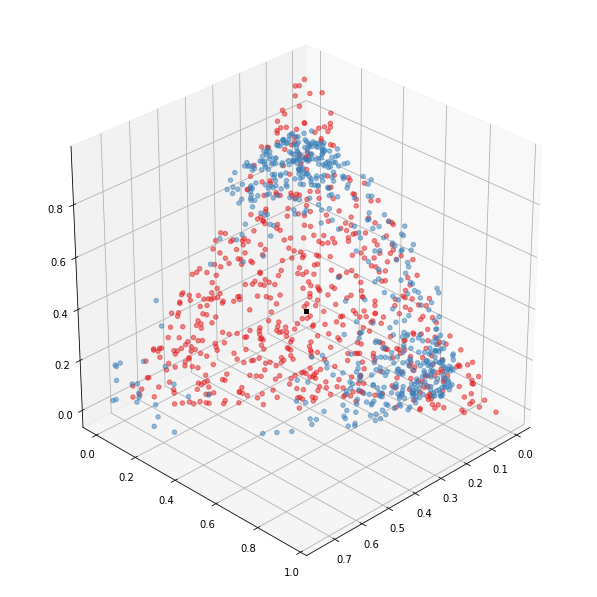

In [6]:
plot_prosection([lin4D, sph4D])

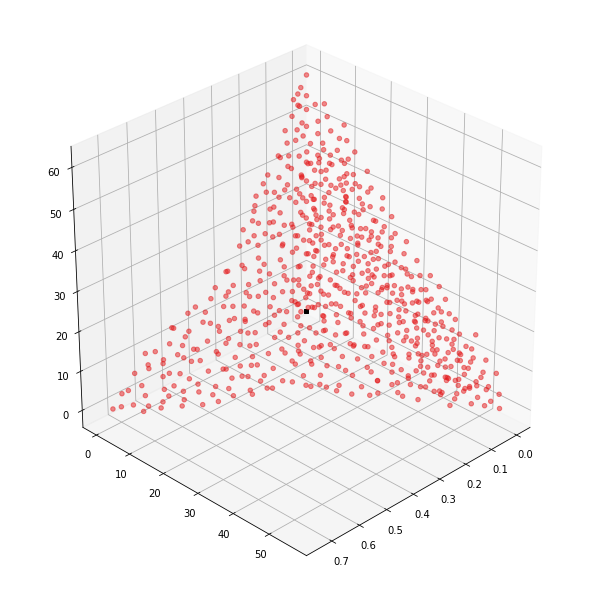

In [7]:
plot_prosection([deb4D1], normalize=True)

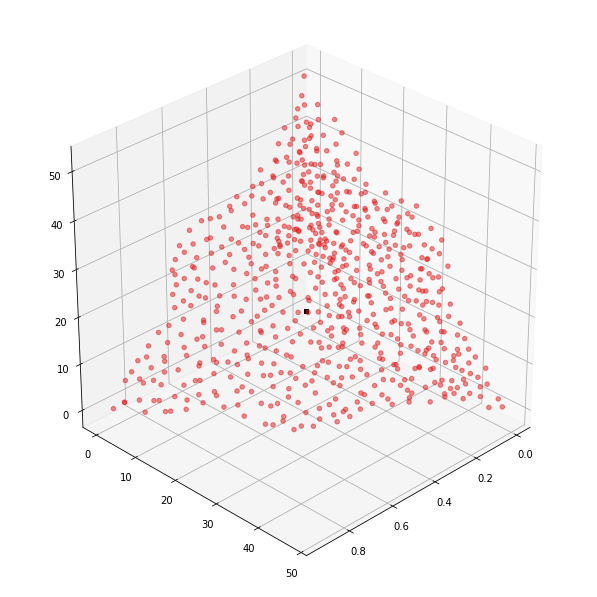

In [8]:
plot_prosection([deb4D2], normalize=True)